In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

uploaded = files.upload()  # Faça o upload do seu arquivo Excel

# Carregar os dados
df = pd.read_excel(next(iter(uploaded.keys())))

# Visualizar as primeiras linhas para verificar se os dados foram carregados corretamente
df.head()


Saving ResultadosExperimento (1).xlsx to ResultadosExperimento (1) (1).xlsx


,Tempo de Resposta V1,Uso de Memoria V1,Tempo de Resposta V2,Uso de Memoria V2,Tempo de Resposta V3,Uso de Memoria V3,Tempo de Resposta V4,Uso de Memoria V4,Tempo de Resposta V5,Uso de Memoria V5,Tempo de Resposta V6,Uso de Memoria V6,Tempo de Resposta V7,Uso de Memoria V7,Tempo de Resposta V8,Uso de Memoria V8,Tempo de Resposta V9,Uso de Memoria V9,Tempo de Resposta V10,Uso de Memoria V10
0,1.15,41.2,1.37,41.6,1.52,41.0,1.45,41.3,1.61,42.0,1.41,41.7,1.49,43.1,1.41,43.2,1.42,43.6,1.18,42.3


Gráfico 4 - Linhas Duplas

Gráfico - Pontos no Eixo Y

Saving ResultadosExperimento (1).xlsx to ResultadosExperimento (1) (6).xlsx


<ipython-input-7-3bff886f3122>:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-7-3bff886f3122>:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))


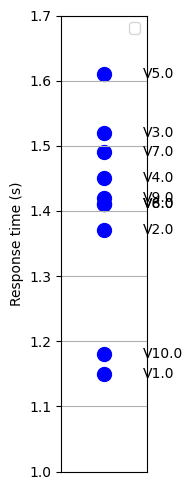

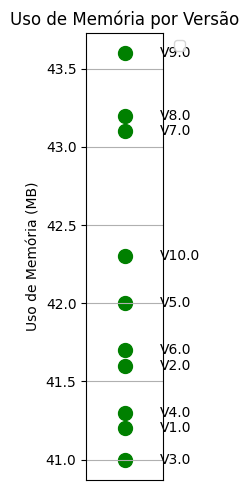

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt # Importing the matplotlib.pyplot module

uploaded = files.upload()  # Faça o upload do seu arquivo Excel

# Carregar os dados
df = pd.read_excel(next(iter(uploaded.keys())))

# Visualizar as primeiras linhas para verificar se os dados foram carregados corretamente
df.head()

# Obter colunas de tempo e memória
tempo_cols = df.filter(like='Tempo de Resposta').columns
memoria_cols = df.filter(like='Uso de Memoria').columns

# Extrair número da versão
versoes = tempo_cols.str.extract(r'V(\d+)')[0].astype(int)
versoes.name = 'Versão'

# Como só há uma linha, usamos os próprios valores como "média"
media_tempo = df[tempo_cols].iloc[0]
media_memoria = df[memoria_cols].iloc[0]

# Simular desvio padrão como 5% dos valores
std_tempo = media_tempo * 0.05
std_memoria = media_memoria * 0.05

# Criar DataFrame final
dados = pd.DataFrame({
    'Versão': versoes,
    'Tempo Médio': media_tempo.values,
    'Tempo STD': std_tempo.values,
    'Memória Média': media_memoria.values,
    'Memória STD': std_memoria.values
}).sort_values(by='Versão')

# =========================
# GRÁFICO 1: Tempo de Resposta
# =========================
plt.figure(figsize=(2, 5))
#plt.scatter(dados['Versão'], dados['Tempo Médio'], color='blue', label='Tempo de Resposta (média)')
plt.scatter([1]*len(dados), dados['Tempo Médio'], color='blue', s=100)
plt.ylim(1, 1.7)

# Configurações para remover o eixo X
plt.gca().xaxis.set_visible(False)  # Remove o eixo X completamente
#plt.title('Tempo de Resposta por Versão')
plt.ylabel('Response time (s)')
plt.grid(True, axis='y')  # Mostra apenas grade no eixo Y
plt.legend()

# Adiciona rótulos das versões ao lado dos pontos
for i, row in dados.iterrows():
    plt.text(1.05, row['Tempo Médio'], f'V{row["Versão"]}', va='center')

plt.tight_layout()
#plt.show()
plt.savefig("Expc1.pdf", format="pdf", bbox_inches="tight")

# =========================
# GRÁFICO 2: Uso de Memória
# =========================
plt.figure(figsize=(2, 5))
plt.scatter([1]*len(dados), dados['Memória Média'], color='green', s=100)

# Configurações para remover o eixo X
plt.gca().xaxis.set_visible(False)  # Remove o eixo X completamente
plt.title('Uso de Memória por Versão')
plt.ylabel('Uso de Memória (MB)')
plt.grid(True, axis='y')  # Mostra apenas grade no eixo Y
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Adiciona rótulos das versões ao lado dos pontos
for i, row in dados.iterrows():
    plt.text(1.05, row['Memória Média'], f'V{row["Versão"]}', va='center')

plt.tight_layout()
plt.show()

Gráfico- Média e Desvio Padrão

Plotando os Resultados da versão 11 na area definida

Saving ResultadosExperimento (1).xlsx to ResultadosExperimento (1) (5).xlsx


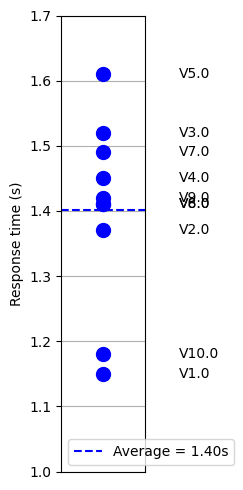

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

# Carregar os dados
uploaded = files.upload()
df = pd.read_excel(next(iter(uploaded.keys())))

# Seleciona as colunas de tempo de resposta
tempo_cols = df.filter(like='Tempo de Resposta').columns

# Extrai os valores (assume uma única linha com os dados)
tempos = df[tempo_cols].iloc[0].values

# Extrair versões (V1, V2, ...)
versoes = tempo_cols.str.extract(r'V(\d+)')[0].astype(int)
versoes.name = 'Versão'

# Criar um DataFrame simples para usar no loop de texto
# Embora a média não seja usada para plotar os pontos individuais,
# o loop de texto precisa de um DataFrame com as versões e tempos
# Usaremos 'tempos' diretamente para plotar os pontos
dados = pd.DataFrame({
    'Versão': versoes,
    'Tempo Médio': tempos # Usamos os tempos individuais aqui para o loop
})

# Calcula a média
media_tempo = tempos.mean()

# === Gráfico apenas com eixo Y ===
plt.figure(figsize=(3, 5))  # Gráfico estreito e alto
plt.ylim(1, 1.7)

# Define a posição X fixa para os pontos e rótulos
x_pos = 1

# Plota os tempos individuais como pontos verticais
plt.plot([x_pos]*len(tempos), tempos, 'o', color='blue', markersize=10)


# Adicionar rótulos das versões
# Usamos o DataFrame 'dados' criado acima
for i, row in dados.iterrows():
    plt.text(x_pos + 0.10, row['Tempo Médio'], f'V{row["Versão"]}', va='center')

# Linha da média
plt.axhline(media_tempo, color='blue', linestyle='--', label=f'Average = {media_tempo:.2f}s')

# Ajustes de visualização
plt.ylabel('Response time (s)')
plt.xticks([])  # Remove o eixo X
#plt.title('Tempo de Resposta - V1 a V10')
plt.legend(loc='lower left')
plt.grid(True, axis='y')
plt.tight_layout()
#plt.show()
plt.savefig("Exp22.pdf", format="pdf", bbox_inches="tight")

Saving ResultadosExperimento (1).xlsx to ResultadosExperimento (1) (17).xlsx


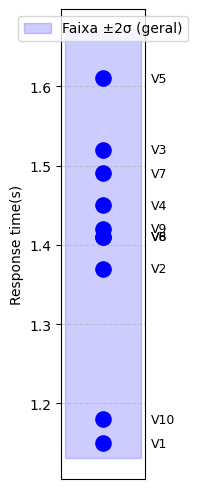

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados
uploaded = files.upload()
df = pd.read_excel(next(iter(uploaded.keys())))

# Selecionar colunas de tempo de resposta
tempo_cols = df.filter(like='Tempo de Resposta').columns
versoes = tempo_cols.str.extract(r'V(\d+)')[0].astype(int)

# Extrair os tempos (assume uma linha com V1 a V10)
tempos = df[tempo_cols].iloc[0].values

# Calcular média e desvio padrão gerais
media_geral = np.mean(tempos)
std_geral = np.std(tempos)

# Limites da faixa ±2σ
desvio_duplo = 2 * std_geral
limite_inferior = media_geral - desvio_duplo
limite_superior = media_geral + desvio_duplo

# Expandir o limite para garantir simetria e folga visual
padding = 0.05 * (limite_superior - limite_inferior)
ylim_inferior = limite_inferior - padding
ylim_superior = limite_superior + padding

# Criar DataFrame para plotagem
dados = pd.DataFrame({
    'Versão': versoes.astype(int),
    'Tempo Médio': tempos
}).sort_values(by='Tempo Médio', ascending=False)

# === Gráfico vertical ===
plt.figure(figsize=(2, 5))
plt.ylim(1, 1.7)
x_pos = 1

# Faixa azul simétrica (±2σ da média)
plt.fill_betweenx(
     y=[limite_inferior, limite_superior],
     x1=x_pos - 0.2,
     x2=x_pos + 0.2,
     color='blue',
     alpha=0.2,
     label='Faixa ±2σ (geral)'
)

# Pontos médios
plt.scatter([x_pos] * len(dados), dados['Tempo Médio'], color='blue', s=120, zorder=3)

# Rótulos das versões
for i, row in dados.iterrows():
    plt.text(x_pos + 0.25, row['Tempo Médio'], f'V{int(row["Versão"])}', va='center', fontsize=9)

# Ajustes visuais
plt.ylim(ylim_inferior, ylim_superior)
plt.gca().xaxis.set_visible(False)
plt.ylabel('Response time(s)')
#plt.title('Tempo de Resposta - Faixa ±2σ baseada na média geral')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='upper center')
plt.tight_layout()
plt.show()
#plt.savefig("Exp3.pdf", format="pdf", bbox_inches="tight")


Saving ResultadosExperimento (1).xlsx to ResultadosExperimento (1) (4).xlsx


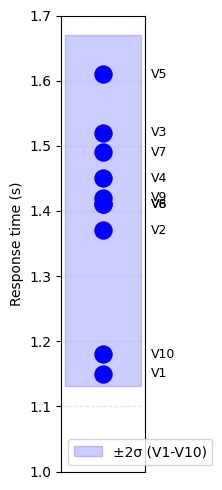

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados
uploaded = files.upload()
df = pd.read_excel(next(iter(uploaded.keys())))

# Seleciona colunas de tempo de resposta
tempo_cols = df.filter(like='Tempo de Resposta').columns
versoes = tempo_cols.str.extract(r'V(\d+)')[0].astype(int)

# Extrai os tempos (assume uma única linha)
tempos = df[tempo_cols].iloc[0].values

# Calcula média e desvio padrão gerais
media_geral = np.mean(tempos)
std_geral = np.std(tempos)

# Criar DataFrame com tempos individuais
dados = pd.DataFrame({
    'Versão': versoes.astype(int),
    'Tempo Médio': tempos
}).sort_values(by='Tempo Médio', ascending=False)

# Gráfico vertical
plt.figure(figsize=(2, 5))
plt.ylim(1,1.7)
x_pos = 1  # Posição X fixa para todos os pontos

# Área de desvio padrão baseada na média geral
plt.fill_betweenx(
    y=[media_geral - 2 * std_geral, media_geral + 2 * std_geral],
    x1=x_pos - 0.2,
    x2=x_pos + 0.2,
    color='blue',
    alpha=0.2,
    label='±2σ (V1-V10)'
)

# Pontos médios individuais
plt.scatter(
    [x_pos] * len(dados),
    dados['Tempo Médio'],
    color='blue',
    s=150,
    zorder=3
)

# Rótulos das versões
for i, row in dados.iterrows():
    plt.text(x_pos + 0.25, row['Tempo Médio'], f'V{int(row["Versão"])}', va='center', fontsize=9)

# Ajustes visuais
plt.gca().xaxis.set_visible(False)
plt.ylabel('Response time (s)')
#plt.title('Tempo de Resposta (±2σ com base na média geral)')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(loc='lower left')
plt.tight_layout()
#plt.show()
plt.savefig("Exp33.pdf", format="pdf", bbox_inches="tight")

Faça upload do arquivo ResultadosExperimento(1).xlsx


Saving ResultadosExperimento (1).xlsx to ResultadosExperimento (1) (13).xlsx
Agora, faça upload do arquivo ResultadosExperimentoV11.xlsx


Saving ResultadosExperimentoV11.xlsx to ResultadosExperimentoV11 (9).xlsx


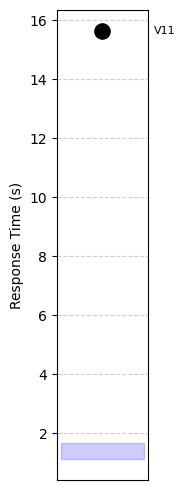

In [ ]:
import pandas as pd
from google.colab import files
import io
import matplotlib.pyplot as plt
import numpy as np

# Upload dos arquivos
print("Faça upload do arquivo ResultadosExperimento(1).xlsx")
uploaded = files.upload()
df_base = pd.read_excel(io.BytesIO(uploaded[next(iter(uploaded))]), sheet_name='Página1')

print("Agora, faça upload do arquivo ResultadosExperimentoV11.xlsx")
uploaded = files.upload()
df_v11 = pd.read_excel(io.BytesIO(uploaded[next(iter(uploaded))]), sheet_name='Página1')

# Seleciona colunas de tempo de resposta
tempo_cols_base = df_base.filter(like='Tempo de Resposta').columns
tempo_values_base = df_base[tempo_cols_base].iloc[0].values

# Calcula média e desvio padrão
mean_tempo_base = np.mean(tempo_values_base)
std_tempo_base = np.std(tempo_values_base)

# Extrai tempo de resposta da V11
tempo_v11_col = df_v11.filter(like='Tempo de Resposta').columns
tempo_v11 = df_v11[tempo_v11_col[0]].iloc[0] if len(tempo_v11_col) > 0 else float('nan')

# === GRÁFICO ===
plt.figure(figsize=(2, 5))
x_pos = 1

# Área de desvio padrão (±2σ)
plt.fill_betweenx(
    y=[mean_tempo_base - 2 * std_tempo_base, mean_tempo_base + 2 * std_tempo_base],
    x1=x_pos - 0.2,
    x2=x_pos + 0.2,
    color='blue',
    alpha=0.2,
    #label='Range ± 2σ (V1–V10)'
)

# Ponto da V11
if not np.isnan(tempo_v11):
    plt.scatter(
        [x_pos],  # Mesmo x_pos da faixa
        [tempo_v11],
        color='black',
        edgecolor='black',
        s=120,
        #label=f'Time V11: {tempo_v11:.2f}s',
        zorder=4
    )
    plt.text(x_pos + 0.25, tempo_v11, 'V11', va='center', fontsize=8)

# Ajustes visuais
plt.gca().xaxis.set_visible(False)
plt.ylabel('Response Time (s)')
#plt.title('V11 Response Time vs. Range (V1–V10)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
#plt.legend(loc='lower left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
#plt.show()
plt.savefig("Exp44.pdf", format="pdf", bbox_inches="tight")